# DS-7331 Machine Learning Mini Project
## Airbnb Price Data - Logistic and SVM
### Allen Miller, Ana Glaser, Jake Harrison, Lola Awodipe

https://nbviewer.jupyter.org/github/allenmiller17/SMU_7331_ML1_Project_1/blob/main/Project_1_Final_Write_Up.ipynb

In [1]:
import warnings
#warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

from sklearn import metrics

In [2]:
#importing the data
pdata = pd.read_csv("airbnb.csv")
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               73911 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  description             74111 non-null  object 
 11  first_review            58247 non-null  object 
 12  host_has_profile_pic    73923 non-null  object 
 13  host_identity_verified  73923 non-null  object 
 14  host_response_rate      55812 non-null

### Business Understanding

In [3]:
#unlogging the logged price data field for easier interpretation
#pdata['price'] = np.exp(pdata.log_price)
pdata = pdata.dropna()

In [4]:
#value_list = ["Apartment","House","Condominium","Loft","Townhouse"]
#value_list = ["Apartment","House"]
value_list = ["Apartment"]
boolean_series = ~pdata.property_type.isin(value_list)
filtered_df = pdata[boolean_series]

filtered_df.head(100)

for i in list (filtered_df.index):
    pdata.loc[i,'property_type'] = "other"

pdata["region"] = pd.cut(pdata.longitude,[-200,-100,0],2,labels=["West","East"])

In [ ]:
pdata.head()

replaceStruct = {
                "cleaning_fee":     {True: 1, False: 0},
                "instant_bookable":     {"t": 1, "f": 0},
                "host_has_profile_pic":     {"t": 1, "f": 0},
                "host_identity_verified":     {"t": 1, "f": 0},
                 "property_type":     {"Apartment": 1, "House": 2, "other": 3},
                    }

pdata=pdata.replace(replaceStruct)
pdata.head()

In [5]:
replaceStruct = {
                "cleaning_fee":     {True: 1, False: 0},
                "instant_bookable":     {"t": 1, "f": 0},
                "host_has_profile_pic":     {"t": 1, "f": 0},
                "host_identity_verified":     {"t": 1, "f": 0},
                 "property_type":     {"Apartment": 1, "other": 2},
                    }

pdata=pdata.replace(replaceStruct)
pdata.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,region
1,6304928,5.129899,1,Entire home/apt,7,1.0,Real Bed,strict,1,NYC,...,9/23/2017,40.766115,-73.989040,Hell's Kitchen,6,93.0,10019,3.0,3.0,East
2,7919400,4.976734,1,Entire home/apt,5,1.0,Real Bed,moderate,1,NYC,...,9/14/2017,40.808110,-73.943756,Harlem,10,92.0,10027,1.0,3.0,East
4,3808709,4.744932,1,Entire home/apt,2,1.0,Real Bed,moderate,1,DC,...,1/22/2017,38.925627,-77.034596,Columbia Heights,4,40.0,20009,0.0,1.0,East
5,12422935,4.442651,1,Private room,2,1.0,Real Bed,strict,1,SF,...,9/5/2017,37.753164,-122.429526,Noe Valley,3,100.0,94131,1.0,1.0,West
7,13971273,4.787492,2,Entire home/apt,2,1.0,Real Bed,moderate,1,LA,...,4/12/2017,34.046737,-118.260439,Downtown,9,93.0,90015,1.0,1.0,West


In [ ]:
pdata.nunique()

In [6]:


oneHotCols=["room_type","bed_type","neighbourhood","city","cancellation_policy","cleaning_fee","region"]
#oneHotCols=["room_type","bed_type","city","cancellation_policy","region","neighbourhood"]
#pdata.drop(['description','neighbourhood','host_response_rate','first_review','host_since','last_review','zipcode','id','latitude','longitude'], axis=1, inplace=True)
pdata.drop(['description','host_response_rate','first_review','host_since','last_review','zipcode','id','latitude','longitude'], axis=1, inplace=True)
pdata=pd.get_dummies(pdata, columns=oneHotCols)
pdata.head(10)

,log_price,property_type,accommodates,bathrooms,host_has_profile_pic,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,...,city_SF,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,cleaning_fee_0,cleaning_fee_1,region_West,region_East
1,5.129899,1,7,1.0,1,0,1,6,93.0,3.0,...,0,0,0,1,0,0,0,1,0,1
2,4.976734,1,5,1.0,1,1,1,10,92.0,1.0,...,0,0,1,0,0,0,0,1,0,1
4,4.744932,1,2,1.0,1,1,1,4,40.0,0.0,...,0,0,1,0,0,0,0,1,0,1
5,4.442651,1,2,1.0,1,1,1,3,100.0,1.0,...,1,0,0,1,0,0,0,1,1,0
7,4.787492,2,2,1.0,1,1,0,9,93.0,1.0,...,0,0,1,0,0,0,0,1,1,0
8,4.787492,2,2,1.0,1,0,0,159,99.0,1.0,...,1,0,1,0,0,0,0,1,1,0
10,4.605170,1,2,1.0,1,1,0,82,93.0,1.0,...,0,0,0,1,0,0,0,1,0,1
11,5.010635,2,4,1.5,1,1,0,29,97.0,2.0,...,0,0,0,1,0,0,0,1,1,0
13,5.298317,1,6,1.5,1,1,1,13,89.0,2.0,...,0,0,0,1,0,0,0,1,0,1
17,4.595120,2,2,2.0,1,1,0,12,88.0,1.0,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
print(pdata)

In [7]:

X = pdata.drop('property_type',axis=1)     
Y = pdata['property_type']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

x_train.head()

,log_price,accommodates,bathrooms,host_has_profile_pic,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,...,city_SF,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,cleaning_fee_0,cleaning_fee_1,region_West,region_East
36694,4.521789,2,1.0,1,1,0,153,99.0,1.0,1.0,...,0,1,0,0,0,0,0,1,1,0
50548,5.010635,3,1.0,1,1,0,10,100.0,1.0,2.0,...,0,0,1,0,0,0,0,1,0,1
7142,4.094345,2,1.0,1,1,0,34,92.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,1
36775,5.634790,2,1.0,1,0,1,3,87.0,0.0,1.0,...,0,1,0,0,0,0,1,0,0,1
65349,5.393628,4,1.0,1,1,0,3,100.0,1.0,1.0,...,0,0,1,0,0,0,0,1,0,1


In [8]:
from sklearn.preprocessing import StandardScaler
ScaleObj = StandardScaler()
ScaleObj.fit(x_train)

X_train_scaled = ScaleObj.transform(x_train)
X_test_scaled = ScaleObj.transform(x_test)

In [9]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

80.00% data is in training set
20.00% data is in test set


In [10]:

# Fit the model on train
modelFIRST = LogisticRegression(solver="liblinear")
modelFIRST.fit(X_train_scaled, y_train)
#predict on test
y_predict = modelFIRST.predict(X_test_scaled)


coef_df = pd.DataFrame(modelFIRST.coef_)
coef_df['intercept'] = modelFIRST.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.450651  0.003663  0.342112  0.002389 -0.039161 -0.015201  0.097252   

          7         8         9  ...       614       615       616       617  \
0  0.073487  0.117839  0.100876  ... -0.008983  0.009839 -0.003709 -0.016545   

        618       619       620       621       622  intercept  
0  0.118003 -0.005224  0.005224  0.263519 -0.263519  -0.833478  

[1 rows x 624 columns]


In [11]:
coef_df.head()

,0,1,2,3,4,5,6,7,8,9,...,614,615,616,617,618,619,620,621,622,intercept
0,0.450651,0.003663,0.342112,0.002389,-0.039161,-0.015201,0.097252,0.073487,0.117839,0.100876,...,-0.008983,0.009839,-0.003709,-0.016545,0.118003,-0.005224,0.005224,0.263519,-0.263519,-0.833478


In [12]:
model_score = modelFIRST.score(X_test_scaled, y_test)
print(model_score)

0.7684395090590298


Trainig accuracy 0.7800116890707188

Testing accuracy 0.7684395090590298

Confusion Matrix


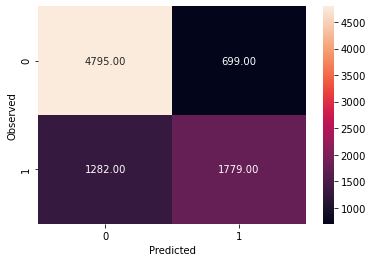

None


In [13]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

print("Trainig accuracy",modelFIRST.score(X_train_scaled,y_train))  
print()
print("Testing accuracy",modelFIRST.score(X_test_scaled, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))


In [ ]:
pdata.nunique()

In [ ]:
#AUC ROC curve


In [14]:
modelFIRST.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [15]:
#Starting with L2
train_score=[]
test_score=[]
solver = ['newton-cg','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train_scaled, y_train) 
    y_predict = model.predict(X_test_scaled)     
    train_score.append(round(model.score(X_train_scaled, y_train),3))
    test_score.append(round(model.score(X_test_scaled, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

C:\Users\geeki\anaconda3\envs\ML7331\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


['newton-cg', 'liblinear', 'sag', 'saga']

[0.78, 0.78, 0.78, 0.779]

[0.768, 0.768, 0.768, 0.768]


C:\Users\geeki\anaconda3\envs\ML7331\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [ ]:
pdata.nunique()

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)


In [ ]:
#Evaluate the SVM Model
y_pred = svm_model.predict(X_test_scaled)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))